This is the code for my article <a href = "https://medium.com/@jcheigh"> Demystifying Machine Learning </a>.</p> 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

import random

In [6]:
# possible values 

colors = ["Red",
          "Maroon",
          "Orange", 
          "Yellow",
          "Green",
          "Blue",
          "Purple",
          "Brown",
          "Black"
         ]

firmness_levels = ["Very Squishy",
                   "Squishy",
                   "Soft",
                   "Firm",
                   "Very Firm",
                   "Rock Hard"
                  ]

def generate_rows(color_lst, firmness_lst, label = "word", n_rows = 500):
    data = []
    
    if label == "word":
        label_lst = ["Good", "Bad"]
    
    if label == "num":
        label_lst = [0,1]
        
    assert len(label_lst) == 2
        
    for _ in range(n_rows // 2):
        color = random.choice(color_lst)
        firmness = random.choice(firmness_lst)
        label_val = random.choice(label_lst)
        data.append([firmness, color, label_val])
    
    return data 

data_words = generate_rows(colors, firmness_levels)

df_words = pd.DataFrame(data_words, columns=["Firmness", "Color", "Label"])

df_words = df_words.sample(frac = 1).reset_index(drop = True) # shuffle 

df_words.head()

,Firmness,Color,Label
0,Very Firm,Brown,Good
1,Soft,Yellow,Good
2,Very Squishy,Brown,Good
3,Squishy,Maroon,Good
4,Rock Hard,Red,Bad


In [24]:
colors = list(range(-10, 11))
firmness_levels = list(range(-10,11))

data = generate_rows(colors, firmness_levels, label = "num")

df = pd.DataFrame(data, columns = ["Firmness", "Color", "Good"])

df.head()

,Firmness,Color,Good
0,3,10,0
1,-3,10,1
2,-9,5,1
3,10,9,0
4,-10,9,1


In [ ]:
np.random.normal()

In [16]:
def generate_X_nonlinear(N = 10000, R = 5):
    # CODE FROM DIS COPENHAGEN!
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

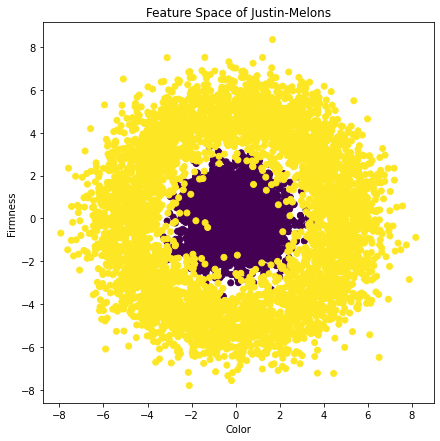

In [29]:
X, y = generate_X_nonlinear()

plt.figure(figsize = (7, 7))
plt.title("Feature Space of Justin-Melons")
plt.xlabel("Color")
plt.ylabel("Firmness")
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))
plt.savefig("/Users/jcheigh/Desktop/Feature Space.png")
plt.show()

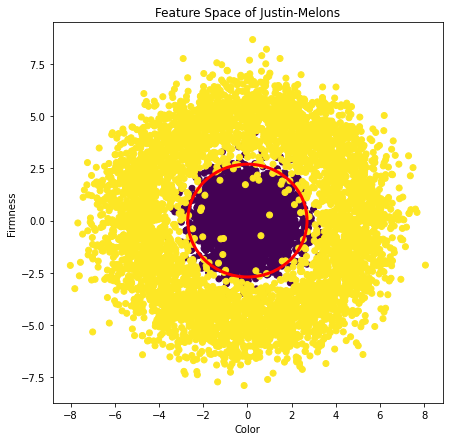

<Figure size 720x720 with 0 Axes>

In [36]:
center = (0,0)
major_radius = 2.7
minor_radius = 2.7

ellipse = Ellipse(center, major_radius * 2, minor_radius * 2, edgecolor='red', facecolor='none', linewidth = 3)

X, y = generate_X_nonlinear()
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
plt.title("Feature Space of Justin-Melons")
plt.xlabel("Color")
plt.ylabel("Firmness")
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))
ax.add_patch(ellipse)
plt.figure(figsize = (10,10))
plt.savefig("/Users/jcheigh/Desktop/Feature Space.png")
plt.show()


PRED on the x axis and our classification on the y axis:

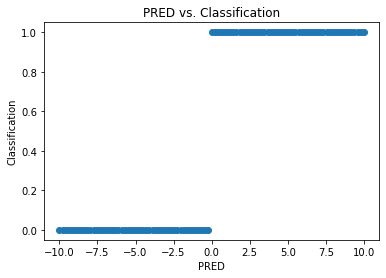

In [44]:
PRED = np.linspace(-10, 10, 99)
classification = np.where(PRED >= 0, 1, 0)

plt.scatter(PRED, classification)
plt.xlabel('PRED')
plt.ylabel('Classification')
plt.title('PRED vs. Classification')

# Show the plot
plt.show()

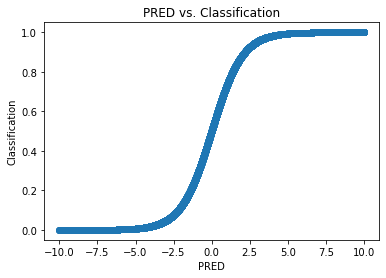

In [43]:
def sigmoid(x):
    e = 2.718281828459045
    return 1 / (1 + e**-x)

PRED = np.linspace(-10, 10, 10000)
classification = sigmoid(PRED)
plt.scatter(PRED, classification)
plt.xlabel('PRED')
plt.ylabel('Classification')
plt.title('PRED vs. Classification')

# Show the plot
plt.show()